<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Student_performance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

DATA EXTRACTION

---

In [5]:
sleep = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/Student_performance.csv")
sleep.head(2), sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


(   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
 0              0.95822          3.4          8.2            53.0    47.0
 1              0.85566          3.2          5.9            55.0    35.0,
 None)

DATA ANALYSIS

---

In [7]:
sns.set()

In [8]:
def plot_stype(data, column1, column2=None, plot_style='hist', style='Whitegrid', **kwargs):
  sns.set_style(style)
  plt.figure(figsize=(15,5))
  if plot_style == 'hist':
    sns.histplot(data=data, x=column1, kde=True, kde_kws=dict(cut=3), **kwargs)
  elif plot_style == 'box':
    sns.boxplot(data=data, x=column1, y=column2, **kwargs)
  elif plot_style == 'scatter':
    sns.scatterplot(data=data, x=column1, y=column2, **kwargs)
  else:
    raise ValueError(f"Unsupported plot style {plot_style}")
  plt.show()

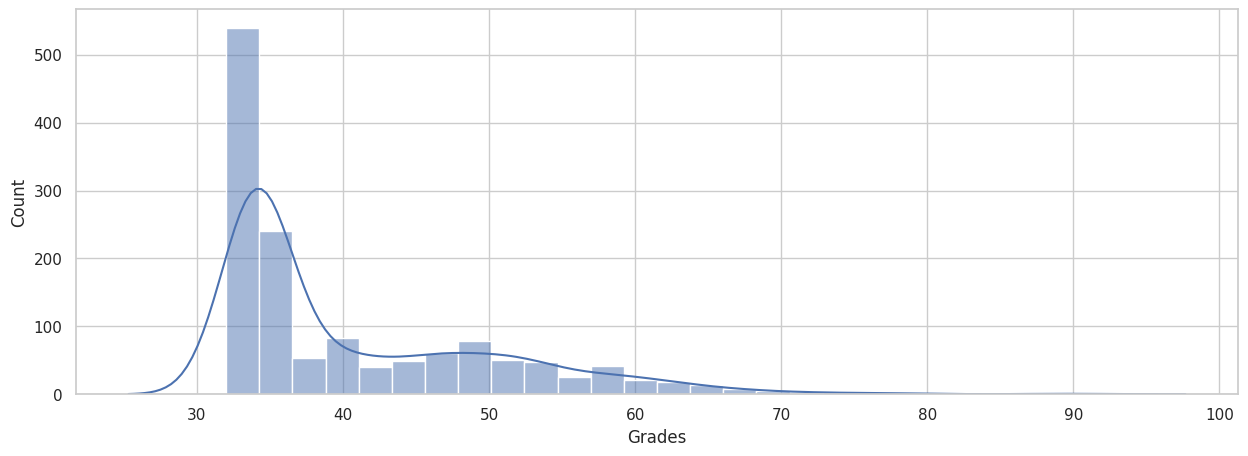

In [12]:
plot_stype(sleep, column1='Grades', plot_style='hist', style='whitegrid')

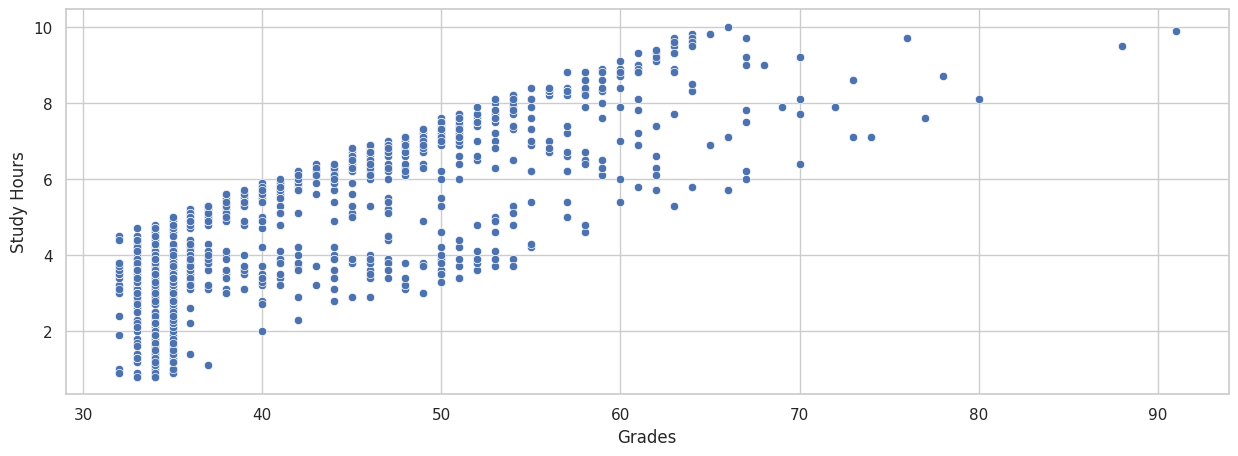

In [13]:
plot_stype(sleep, column1='Grades', column2='Study Hours', plot_style='scatter', style='whitegrid')

In [20]:
corr = sleep.corr()
print(corr['Grades'].sort_values(ascending=False).round(3)*100)

Grades                 100.0
Study Hours             81.1
Socioeconomic Score     33.5
Attendance (%)          32.2
Sleep Hours            -12.5
Name: Grades, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [15]:
X = sleep.iloc[:,:-1]
y = sleep.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

---

In [19]:
test_pred = rg.predict(X_test)
r2_scr = r2_score(y_test, test_pred)
print(f"r2 score for test is {r2_scr}")

importance = rg.feature_importances_.round(3)*100
columns = X.columns
f_i = pd.DataFrame({'Feature':columns,
                    'Importance':importance}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance")
print(f_i)

r2 score for test is 0.9593260928088692

Feature Importance
               Feature  Importance
1          Study Hours        73.4
0  Socioeconomic Score        25.4
2          Sleep Hours         0.6
3       Attendance (%)         0.6
